In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

device(type='cuda')

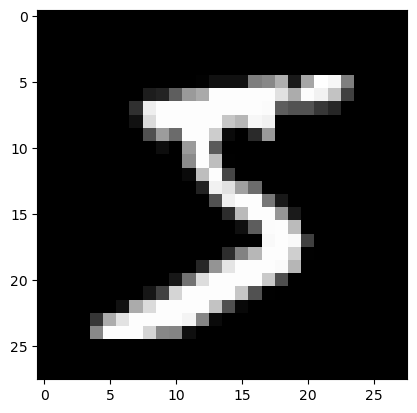

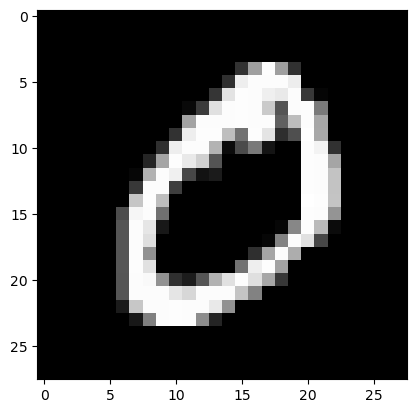

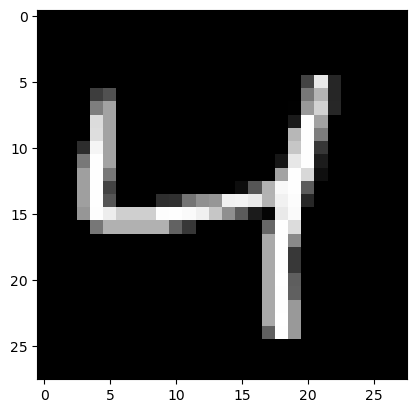

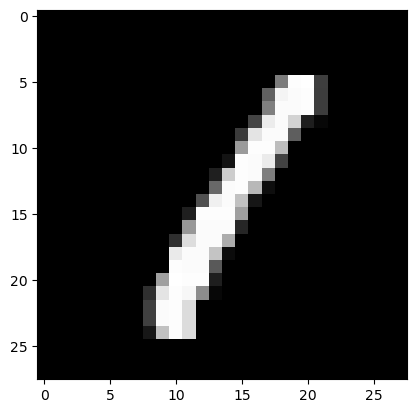

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# show images
for i in range(4):
    imshow(torchvision.utils.make_grid(trainset[i][0]))



In [32]:


# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64*5*5, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64*5*5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net().to(device)  # Move model to GPU

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)  # Move data to GPU
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Test the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)  # Move data to GPU
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


[1,   100] loss: 0.657
[1,   200] loss: 0.164
[1,   300] loss: 0.115
[1,   400] loss: 0.092
[1,   500] loss: 0.091
[1,   600] loss: 0.073
[1,   700] loss: 0.075
[1,   800] loss: 0.062
[1,   900] loss: 0.062
[2,   100] loss: 0.048
[2,   200] loss: 0.054
[2,   300] loss: 0.040
[2,   400] loss: 0.045
[2,   500] loss: 0.046
[2,   600] loss: 0.039
[2,   700] loss: 0.044
[2,   800] loss: 0.042
[2,   900] loss: 0.041
[3,   100] loss: 0.027
[3,   200] loss: 0.029
[3,   300] loss: 0.031
[3,   400] loss: 0.032
[3,   500] loss: 0.033
[3,   600] loss: 0.029
[3,   700] loss: 0.033
[3,   800] loss: 0.035
[3,   900] loss: 0.031
[4,   100] loss: 0.025
[4,   200] loss: 0.022
[4,   300] loss: 0.014
[4,   400] loss: 0.020
[4,   500] loss: 0.022
[4,   600] loss: 0.018
[4,   700] loss: 0.022
[4,   800] loss: 0.030
[4,   900] loss: 0.025
[5,   100] loss: 0.017
[5,   200] loss: 0.014
[5,   300] loss: 0.018
[5,   400] loss: 0.013
[5,   500] loss: 0.021
[5,   600] loss: 0.016
[5,   700] loss: 0.013
[5,   800] 

Epoch [100/1000], Loss: 0.5326
Epoch [200/1000], Loss: 0.3588
Epoch [300/1000], Loss: 0.2558
Epoch [400/1000], Loss: 0.1987
Epoch [500/1000], Loss: 0.1634
Epoch [600/1000], Loss: 0.1391
Epoch [700/1000], Loss: 0.1211
Epoch [800/1000], Loss: 0.1073
Epoch [900/1000], Loss: 0.0964
Epoch [1000/1000], Loss: 0.0875


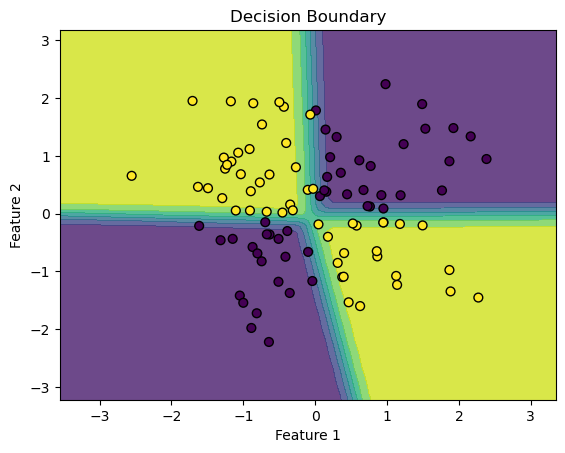

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, 0)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Create an instance of the model
model = SimpleNN()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs.squeeze(), y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()


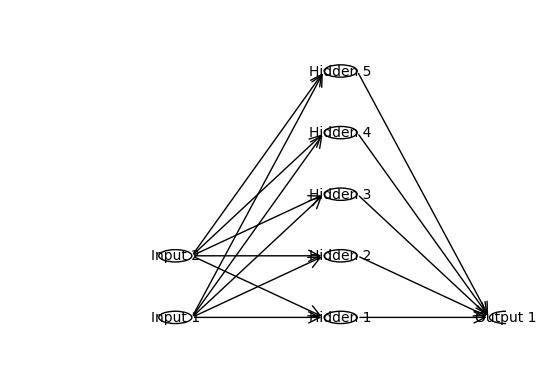